Coeficientes:
α0 (intercepto): 5479.92
α1 (precio): -48.23
α2 (promoción): 3.43


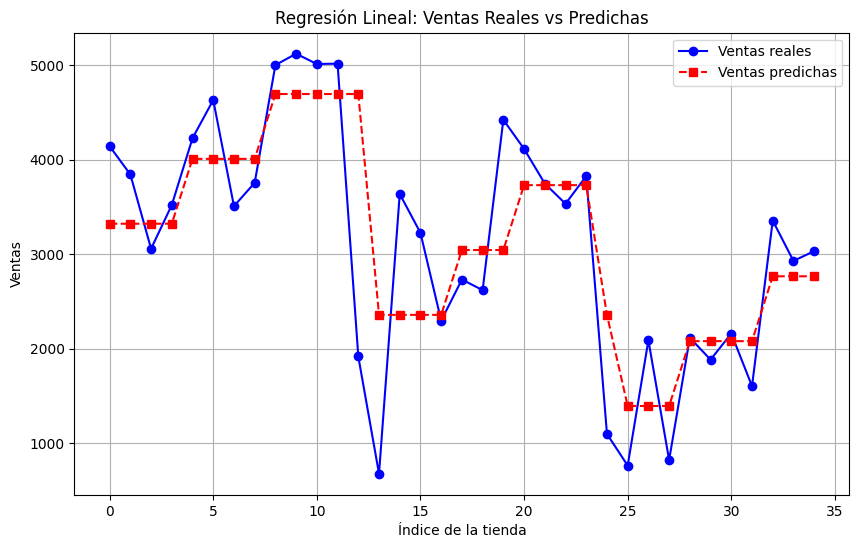

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos (son 35 observaciones)
z = np.array([4141, 3842, 3056, 3519, 4226, 4630, 3507, 3754, 5000, 5120,
              5011, 5015, 1916, 675, 3636, 3224, 2295, 2730, 2618, 4421,
              4113, 3746, 3532, 3825, 1096, 761, 2088, 820, 2114, 1882,
              2159, 1602, 3354, 2927, 3031])  # Ventas
x = np.array([59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 79, 79,
              79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 99, 99, 99, 99, 99,
              99, 99, 99, 99, 99])  # Precio
y = np.array([200, 200, 200, 200, 400, 400, 400, 400, 600, 600, 600, 600,
              600, 200, 200, 200, 200, 400, 400, 400, 600, 600, 600, 600,
              200, 200, 200, 200, 400, 400, 400, 400, 600, 600, 600])  # Promoción

# Crear la matriz de diseño
X = np.column_stack((np.ones(len(z)), x, y)) # matriz X que concatena una columna de unos y las observaciones de las variables independientes (35 x 3)

# Calcular coeficientes de regresión
coef = np.linalg.inv(X.T @ X) @ X.T @ z #el vector de coeficientes que minimiza el cuadrado de los residuales, b_opt= (X^t *X)^-1 *X^t*Y, donde Y es la variable dependiente, en este caso z

# Predicción
z_pred = X @ coef # X*b_opt = Y_opt (3 x 1)

# Mostrar coeficientes
print("Coeficientes:")
print(f"α0 (intercepto): {coef[0]:.2f}")
print(f"α1 (precio): {coef[1]:.2f}")
print(f"α2 (promoción): {coef[2]:.2f}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(z, 'o-', label="Ventas reales", color="blue")
plt.plot(z_pred, 's--', label="Ventas predichas", color="red")
plt.xlabel("Índice de la tienda")
plt.ylabel("Ventas")
plt.title("Regresión Lineal: Ventas Reales vs Predichas")
plt.legend()
plt.grid()
plt.show()


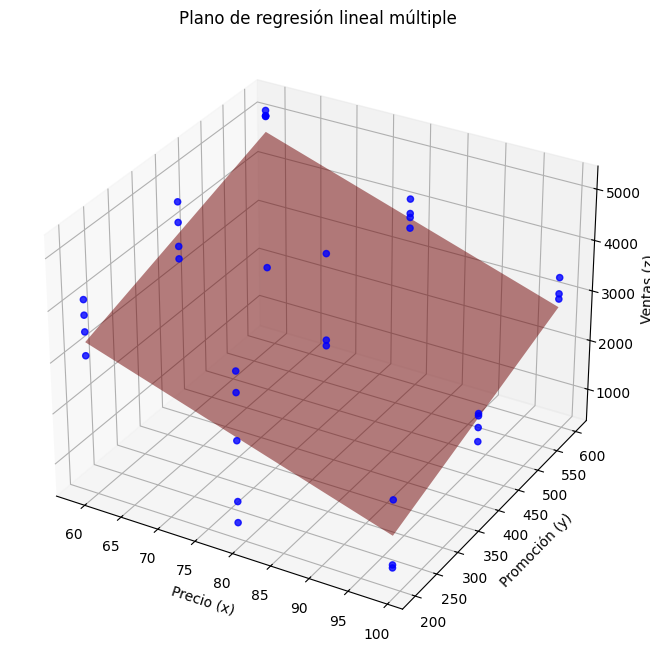

In [11]:
# Grafiquemos cómo se observa nuestra aproximación en el espacio dónde vive el problema R3

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Datos reales
ax.scatter(x, y, z, color='blue', label="Datos reales", alpha=0.8)

# Crear una cuadrícula para el plano
x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 20),
                             np.linspace(min(y), max(y), 20))
z_grid = coef[0] + coef[1] * x_grid + coef[2] * y_grid

# Plano de regresión
ax.plot_surface(x_grid, y_grid, z_grid, color='red', alpha=0.5, rstride=100, cstride=100)

# Etiquetas y configuración
ax.set_xlabel("Precio (x)")
ax.set_ylabel("Promoción (y)")
ax.set_zlabel("Ventas (z)")
ax.set_title("Plano de regresión lineal múltiple")

plt.show()


Podemos ver que hay varias observaciones que comparten 1 y hasta 2 coordenadas, por lo que nos hubiese sido imposible proponer una curva que interpole las observaciones.

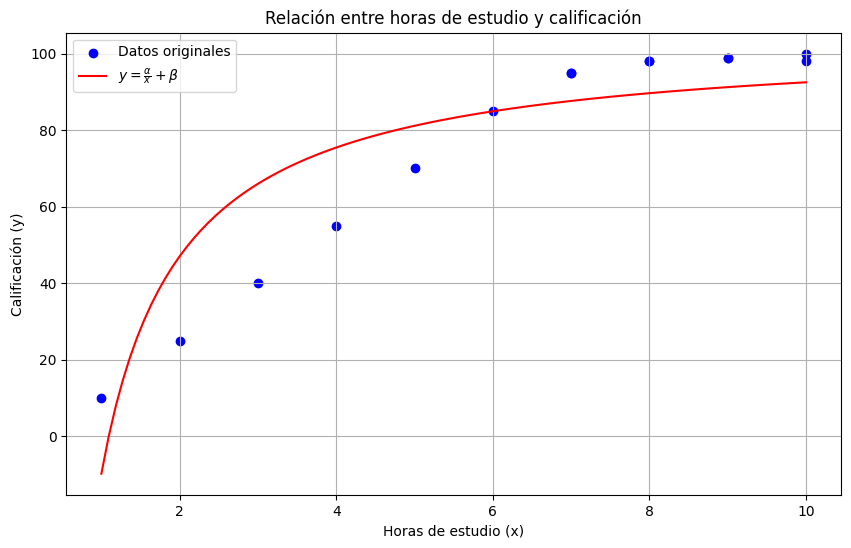

(103.89686665137617, -113.72164129722302)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Datos (son 14 observaciones)
horas_estudio = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 7, 8, 9, 10], dtype=float) #variable independiente x
calificaciones = np.array([10, 25, 40, 55, 70, 85, 95, 98, 99, 98, 95, 98, 99, 100], dtype=float) #variable dependiente y

# Construcción de la matriz X
X = np.column_stack((np.ones_like(horas_estudio), 1 / horas_estudio))  # matriz X que concatena una columna de unos y las observaciones de las variables independientes (14 x 2)

# Resolviendo el sistema X^T X b = X^T y para b
X_transpose_X = X.T @ X
X_transpose_y = X.T @ calificaciones
b = np.linalg.solve(X_transpose_X, X_transpose_y) #(2 x 1)

# Parámetros obtenidos
beta, alpha = b

# Función ajustada
x_fit = np.linspace(min(horas_estudio), max(horas_estudio), 100)
y_fit = alpha / x_fit + beta

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(horas_estudio, calificaciones, color='blue', label='Datos originales')
plt.plot(x_fit, y_fit, color='red', linestyle='-', label=r'$y = \frac{\alpha}{x} + \beta$')
plt.title('Relación entre horas de estudio y calificación')
plt.xlabel('Horas de estudio (x)')
plt.ylabel('Calificación (y)')
plt.legend()
plt.grid(True)
plt.show()

# Resultados de los parámetros
beta, alpha


La curva aproxima de forma eficaz el comportamiento de las calificaciones. Veamos cómo lo hace en comparación los modelos polinomiales del Método de Mínimos Cuadrados. las dos observaciones que obtienen un 10 con distintas horas de estudio nos hubiese hecho imposible interpolar para aproximar el comportamiento.

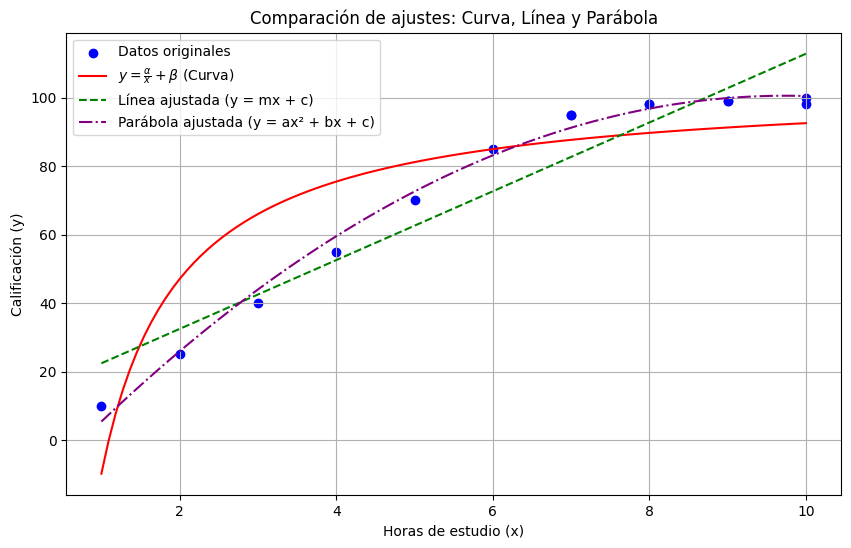

(array([12.37413249, 10.04227129]), 24.270406626506443)

In [15]:
# Método de mínimos cuadrados para una línea (modelo lineal: y = mx + c)
X_line = np.column_stack((np.ones_like(horas_estudio), horas_estudio))
b_line = np.linalg.solve(X_line.T @ X_line, X_line.T @ calificaciones)
c_line, m_line = b_line

# Función ajustada lineal
y_fit_line = m_line * x_fit + c_line

# Método de mínimos cuadrados para una parábola (modelo cuadrático: y = ax^2 + bx + c)
X_parabola = np.column_stack((np.ones_like(horas_estudio), horas_estudio, horas_estudio**2))
b_parabola = np.linalg.solve(X_parabola.T @ X_parabola, X_parabola.T @ calificaciones)
c_parabola, b_parabola, a_parabola = b_parabola

# Función ajustada parabólica
y_fit_parabola = a_parabola * x_fit**2 + b_parabola * x_fit + c_parabola

# Gráfico comparativo
plt.figure(figsize=(10, 6))
plt.scatter(horas_estudio, calificaciones, color='blue', label='Datos originales')
plt.plot(x_fit, y_fit, color='red', linestyle='-', label=r'$y = \frac{\alpha}{x} + \beta$ (Curva)')
plt.plot(x_fit, y_fit_line, color='green', linestyle='--', label='Línea ajustada (y = mx + c)')
plt.plot(x_fit, y_fit_parabola, color='purple', linestyle='-.', label='Parábola ajustada (y = ax² + bx + c)')

plt.title('Comparación de ajustes: Curva, Línea y Parábola')
plt.xlabel('Horas de estudio (x)')
plt.ylabel('Calificación (y)')
plt.legend()
plt.grid(True)
plt.show()

# Parámetros de la línea y la parábola
b_line, b_parabola


El modelo lineal sigue representando una buena aproximación, pero no parece ser mejor que la curva propuesta $y = \frac{\alpha}{x} + \beta$; no obstante, el modelo cuadrático lo aproxima considerablemente mejor. Y como sabemos que las calificaciones viven entre [0, 100], podemos afirmar que la cuadrática es la mejor aprocimación de las 3. No se espera de un polinomio de mayor grado que mejore la aproximación lo suficiente para tenerlo en cuenta.